In [1]:
################################################################################################
################ CMSC320 HW3: Regression analysis of Gapminder data
################ Group_Students: Ang Zhou, Han Yang Shen, Jixiang Fan
################################################################################################

################ Part 2 ##############

## Problem 1

import numpy as np
# Training data (X, y), T time steps, alpha step
def grad_descent1(X, y, T, alpha):
    m, n = X.shape         # m = #examples, n = #features
    theta = np.zeros(n)    # initialize parameters
    f = np.zeros(T)        # track loss over time
    for i in range(T):
        # loss for current parameter vector theta
        f[i] = 0.5*np.linalg.norm(X.dot(theta)-y)**2
        # compute steepest ascent at f(theta)
        g = X.T.dot(X.dot(theta)-y)
        # step down the gradient
        theta = theta - alpha*g
    return theta,f

Problem 2

$  \beta^{k+1} = \beta^k + \alpha \sum_{i=1}^{n} (y_i - p_i(\beta^k))\mathbf{x_i} $

Logistic function: 
$P(Y=0|X)= 1/(1+exp(w_0+\sum_{i=1}^{n} (w_iX_i))) $
;
$P(Y=1|X)= exp(w_0+\sum_{i=1}^{n} (w_iX_i))/(1+exp(w_0+\sum_{i=1}^{n} (w_iX_i))) $

Data conditional likelihood:
$\prod_{l}P(Y^l|W,X^l)$

Log Likelihood:
$l(W)= ln(\prod_{l}P(Y^l|W,X^l))=\sum_{l}Y^l(w_0+\sum_{i}{n})-ln(1+exp(w_0+\sum_{i}^{n}w_iX_i^l)) $

Maximizing Conditioanl Log Likelihood:
$\frac{\partial l(W)}{\partial w_i}=\sum_{l}X_i^l(Y^l-\hat{P}(Y^l=1|X^l,W)) $

So, we get:
$w_{i+1}=w_i+\alpha \sum_{l}X_i^l(Y^l-\hat{P}(Y^l=1|X^l,W)), $ where 
$w_i=\beta^k; l=[1,n]; Y^l=y_i; \hat{P}(Y^l=1|X^l,W)=p_i(\beta^k); X_i^l=\mathbf{x_i}$

In conclusion:
$  \beta^{k+1} = \beta^k + \alpha \sum_{i=1}^{n} (y_i - p_i(\beta^k))\mathbf{x_i} $


In [2]:
## Problem 3

def my_func(x):
    return (np.exp(x)/(1+np.exp(x)))

# Training data (X, y), T time steps, alpha step
def grad_descent2(X, y, T, alpha):
    m, n = X.shape        # m = #examples, n = #features
    theta = np.zeros(n)   # initialize parameters
    f = np.zeros(T)       # track loss over time
    for i in range(T):
        p = my_func(X.dot(theta))
        # loss for current parameter vector theta
        f[i] = ((1/np.log(2))*np.log(1+np.exp(-(y*p)))).sum()
        # compute steepest ascent at f(theta)
        g = (p-y).dot(X)
        # step down the gradient
        theta = theta - alpha*g
    return theta,f

[  7.94850367e+01   2.57559948e+01   2.89556595e+01   6.50043203e+01
   1.88248620e-01   2.40780542e+01  -1.76415494e-01   2.39001714e-02
  -6.79329365e-02  -9.10550679e-02   1.14989374e+01   5.93925739e+01
   6.65446143e+01   2.55295778e+01  -2.22549345e-02   1.30005017e-01
   2.93102335e+01  -1.44395853e-01  -7.93660384e-02   3.39158978e-02]
[-1.66949623 -0.49586933  0.05084346  0.23688944  0.31737657 -1.89223852
 -0.50175843  0.08316485 -0.24790691 -0.98361843  0.19378161 -1.66305013
 -0.69791702 -0.69147637 -0.22129758 -1.64388177 -0.17138095 -0.41230932
 -1.18224244 -0.2108173 ]
Coefficients: 
 [  7.95159346e+01   2.57363812e+01   2.89495234e+01   6.50151047e+01
   2.01824309e-01   2.40986631e+01  -1.89425407e-01   4.99229709e-02
  -9.46277969e-02  -8.31106862e-02   1.14794427e+01   5.94054298e+01
   6.65189452e+01   2.54986657e+01  -3.50404353e-02   1.46624876e-01
   2.93052374e+01  -1.31414354e-01  -8.05344166e-02   4.57118726e-02]
Coefficients: 
 [-1.56208386 -0.4396235   0.065

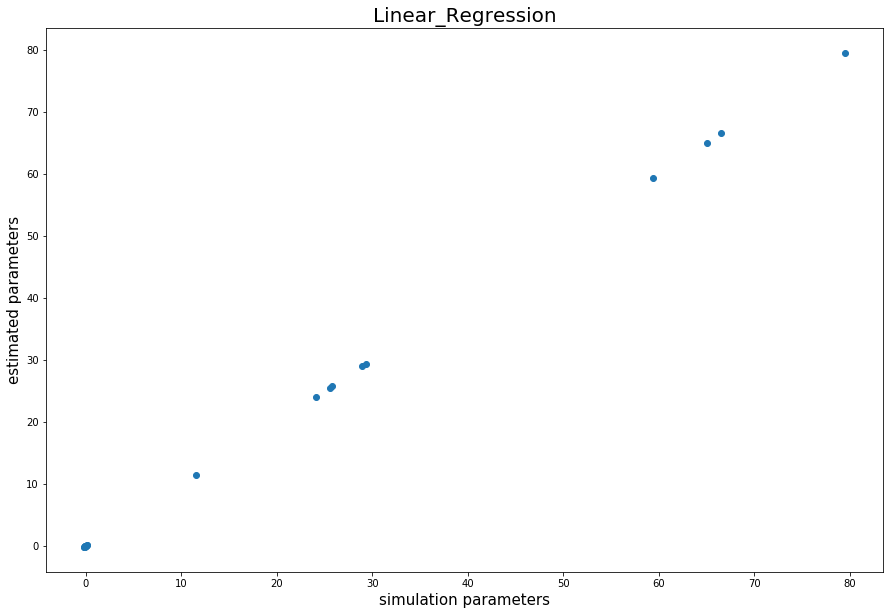

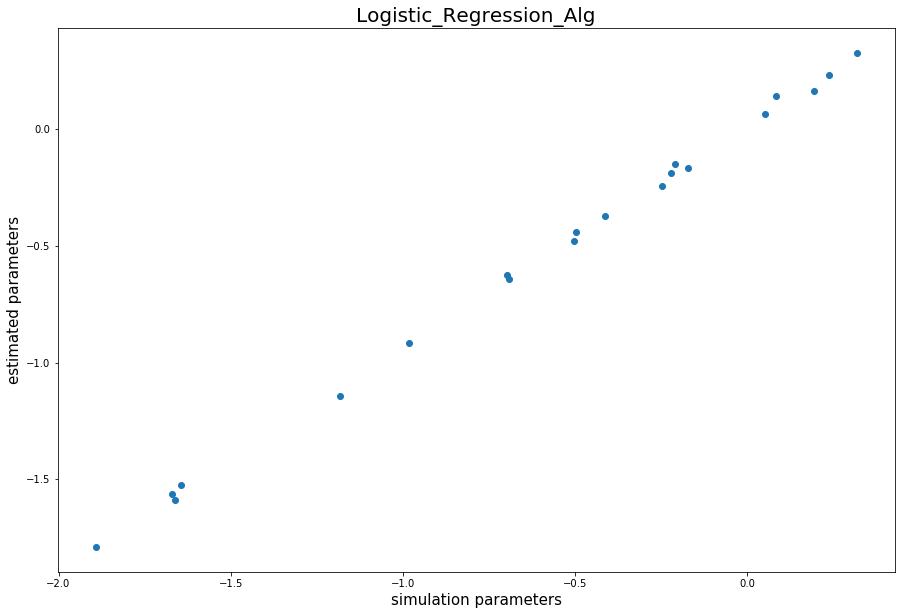

In [3]:
## Problem4
import sklearn.datasets as ds
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
# simulate data for linear regression

gen_data_x, gen_data_y = ds.make_regression(n_samples=100, n_features=20, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = ds.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

# a really bad estimator
# returns random vector as estimated parameters
# dummy = np.ndarray([100, 20])
# for index, row in enumerate(dummy):
#     dummy[index] = np.random.normal(0, .1, 20)
# plt.plot(gen_data_x, dummy)

print(grad_descent1(gen_data_x, gen_data_y, 500, 0.001)[0])
print(grad_descent2(log_gen_data_x, log_gen_data_y, 500, 0.001)[0])

clf1 = lm.LinearRegression()
clf1=clf1.fit(gen_data_x, gen_data_y)
# The coefficients
print('Coefficients: \n', clf1.coef_)

clf2 = lm.LogisticRegression(C=1)
clf2=clf2.fit(log_gen_data_x, log_gen_data_y)
# The coefficients
print('Coefficients: \n', clf2.coef_[0])


x_data1 = grad_descent1(gen_data_x, gen_data_y, 500, 0.001)[0]
y_data1 = clf1.coef_

plt.figure(figsize=(15,10))
plt.plot(x_data1, y_data1,'o')
plt.xlabel("simulation parameters", fontsize=15)
plt.ylabel("estimated parameters", fontsize=15)
plt.title("Linear_Regression_Alg", fontsize=20)

plt.show()

x_data2 = grad_descent2(log_gen_data_x, log_gen_data_y, 500, 0.001)[0]
y_data2 = clf2.coef_[0]

plt.figure(figsize=(15,10))
plt.plot(x_data2, y_data2,'o')
plt.xlabel("simulation parameters", fontsize=15)
plt.ylabel("estimated parameters", fontsize=15)
plt.title("Logistic_Regression_Alg", fontsize=20)

plt.show()
